# Abstract

### The goal of this research is to explain how Perlin Noise works, the problems it addresses, and the different ways of its implementation in various scenarios.
<hr>


<h2 style='text-align: center'>What is Perlin Noise? </h2>
<p> Perlin Noise is a <a href='https://en.wikipedia.org/wiki/Noise_(signal_processing)'>noise</a> generating algorithm, developed by Ken Perlin in 1983. By "noise" we shall understand the, seemingly, random range of values from 0 to 1. </p>
<p> It is often used in generating terrains/worlds in games such as Terraria, Minecraft and No Man's sky. </p>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import noise

<p>Running the code in the cell below will shows what a random noise looks like when graphed.</p>

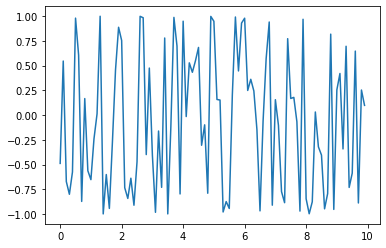

In [39]:
def generate_plot_random():
    x = np.arange(0,10, 0.1)
    y = np.sin(x + np.random.uniform(-10, 10, x.shape))

    plt.plot(x,y)
    plt.show()
generate_plot_random()

<p>If we were to use perlin noise to generate the same graph, the result would've looked a lot more harmonic, like this:</p>

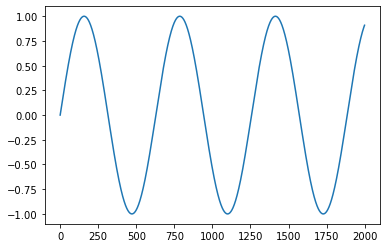

In [47]:
def generate_harmonic_noise():
    x = np.arange(0,20,0.01)
    y = np.sin(x)
    plt.plot(y)

generate_harmonic_noise()

<p><strong>Note:</strong> None of the plots shown above utilize perlin noise.</p>

<p>If we were to visualize the differences between randomly generated noise and perlin noise, they'd look like that: </p>
    <label>Random noise</label>
    <br>
    <img src='https://miro.medium.com/max/600/1*H6lwuHlprj1GYqRmav_Y2A.png'>
    <br>
    <label>Perlin noise</label>
    <br>
    <img src='https://miro.medium.com/max/4096/1*vs239SecVBaB4HvLsZ8O5Q.png' width='300px'>

<p>Both images are taken from <a href='https://medium.com/@yvanscher/playing-with-perlin-noise-generating-realistic-archipelagos-b59f004d8401'> here. </a> </p>


<h2 style="text-align: center"> Theory </h2>
<p>Perlin noise implementation is generally divided into 3 phases:</p>
<ul>
    <li> Defining a grid </li>
    <li> Generating random values for the grid </li>
    <li> Linearly Interploating between the values in the grid </li>
</ul>

<h3 style='text-align: center'>1. Defining a grid </h3>
<p>In order to understand what the grid is, I want you to imagine the following - It is 2007 and you're playing minesweeper on a windows XP computer. Everything that you see, every single tile that you can click on and see whether it has a mine or a number below itself, on the game window makes up the entire grid. This is what the grid is in perlin noise.
</p>

<p> We fill that grid with random values/noise and then we do mathematical operations upon them. The grid is either 2D or 3D, it could also be 1D. It all depends on what we are trying to do.</p>

<p>For the sake of simplicity, and aesthetical results, we'll define a 2D grid and hence our perlin noise will be 2 dimensional.</p>